In [240]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1 

In [241]:
# Load the perceptron-data file
perceptron_data = pickle.load(open('./data/perceptron-data.pkl','rb'),encoding='latin1')

# Convert pickle dict to pandas dataframe
perceptron_df = pd.DataFrame()
perceptron_df['v0'] = perceptron_data['vectors'][0]
perceptron_df['v1'] = perceptron_data['vectors'][1]
perceptron_df['labels'] = perceptron_data['labels'].astype(np.int)

perceptron_df.head()

,v0,v1,labels
0,-3.967563,0.029670,1
1,3.701603,-0.424998,0
2,-1.391995,-0.693690,1
3,0.764722,0.596842,1
4,-0.442530,3.152025,1


In [242]:
class Perceptron:
    
    def __init__(self, epochs, learning_rate, run_number=1):
        # weights corresponding to [bias, w0, w1]
        self.weights = [0.0, 0.0, 0.0]
        self.epochs = epochs
        self.L = learning_rate
        self.run_number = run_number    # for plotting
        self.labels_correct = [None]*self.epochs
    
    def predict(self, vector):
        #y = (w0 * v0) + (w1 * v1) + bias
        y = (self.weights[1] * vector['v0']) + (self.weights[2] * vector['v1']) + self.weights[0]
        return 1 if y >= 0.0 else 0
    
    def train(self, df, accuracy):
        df['predictions'] = np.nan
        df['correct'] = np.nan
        
        for n in range(self.epochs):
            #print('\n*** epoch:', n+1,'***')
            #print('weights:',self.weights)
            
            for index,V in df.iterrows():    # would a lambda function work here instead?
                # print(self.weights)
                # Run the prediction function on each sample
                y = self.predict(V)
                # Update predictions col for each sample
                df.at[index,'predictions'] = y
                
                # Adjust the weights before continuing to the next sample
                # dwi = L*vi*(y_desired - y)
                self.weights[0] = self.weights[0] + self.L*(V['labels'] - y)    # bias
                self.weights[1] = self.weights[1] + self.L*V['v0']*(V['labels'] - y)
                self.weights[2] = self.weights[2] + self.L*V['v1']*(V['labels'] - y)
            
            # Count the number of correct predictions for each epoch
            df['correct'] = df.apply(lambda x: x['labels'] == x['predictions'], axis=1)
            self.labels_correct[n] = (df['correct'].sum() / len(df))
        
        # After a full run, add fractions correct to df for plotting
        #print(self.labels_correct)
        accuracy[f'run_{self.run_number}'] = self.labels_correct
            
        print('Final weights:', self.weights)
        return self.weights


In [88]:
epochs = 300
learning_rate = 0.001

# Create dataframe for plotting purposes
accuracy = pd.DataFrame()
accuracy['epoch'] = list(range(1,epochs+1))

for n in range(1,11):
    print('Running iteration',n)
    perceptron = Perceptron(epochs, learning_rate, run_number=n)
    samples = perceptron_df.sample(frac=1).reset_index(drop=True)
    perceptron.train(samples, accuracy)


Running iteration 1
Final weights: [0.0, -0.009518591061228845, 0.0139808435814757]
Running iteration 2
Final weights: [0.0, -0.01666217967267821, 0.023682783330995508]
Running iteration 3
Final weights: [-0.001, -0.024686488305683547, 0.03345629149343752]
Running iteration 4
Final weights: [-0.001, -0.022499652873916927, 0.033151281101149684]
Running iteration 5
Final weights: [-0.001, -0.025269229212293205, 0.031547719882202306]
Running iteration 6
Final weights: [0.001, -0.02510147843687464, 0.03259774685281093]
Running iteration 7
Final weights: [-0.001, -0.015807815964484433, 0.02410245758750176]
Running iteration 8
Final weights: [-0.002, -0.015061740035619638, 0.023592821087829965]
Running iteration 9
Final weights: [-0.001, -0.023129299517932897, 0.031893822738821354]
Running iteration 10
Final weights: [-0.002, -0.017411654930412995, 0.02232406779724348]


In [89]:
# Display the accuracy dataframe
accuracy

,epoch,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,run_9,run_10
0,1,0.91,0.94,0.92,0.90,0.93,0.92,0.94,0.92,0.92,0.91
1,2,0.98,0.95,0.96,0.97,0.96,0.93,0.92,0.95,0.96,0.96
2,3,0.95,0.97,0.98,0.96,0.96,0.98,0.98,0.97,0.96,0.96
3,4,0.96,0.97,0.97,0.94,0.97,0.98,0.96,0.98,0.95,0.99
4,5,0.96,0.95,0.94,0.96,0.98,0.96,0.94,0.94,0.98,0.98
...,...,...,...,...,...,...,...,...,...,...,...
295,296,0.98,0.99,0.98,0.98,0.98,0.98,0.98,0.99,0.99,0.98
296,297,0.98,0.97,0.98,0.98,0.98,0.98,0.97,0.97,0.97,0.99
297,298,0.98,0.98,0.98,0.98,0.98,0.98,0.99,0.99,0.99,0.98
298,299,0.98,0.97,0.98,0.98,0.98,0.98,0.97,0.97,0.97,0.98


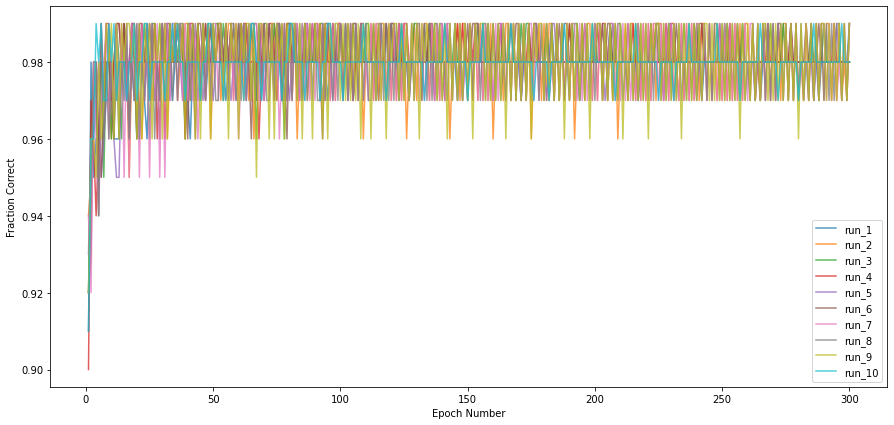

In [575]:
accuracy.plot(x='epoch', y=['run_1','run_2','run_3','run_4','run_5',
                            'run_6','run_7','run_8','run_9','run_10'],
            figsize=(15,7), alpha=0.75, xlabel='Epoch Number', ylabel='Fraction Correct')

## Question 2

In [284]:
# Load the regression-data file
regression_data = pickle.load(open('./data/regression-data.pkl','rb'),encoding='latin1')

# Separate test and train from the pickle dict into 2 dataframes
test_df = pd.DataFrame()
test_df['x'] = regression_data['testx'][0]
test_df['y'] = regression_data['testy'][0]

train_df = pd.DataFrame()
train_df['x'] = regression_data['trainx'][0]
train_df['y'] = regression_data['trainy'][0]

train_df.head()

,x,y
0,-0.992103,0.079115
1,-0.958496,-0.118512
2,-0.823320,0.788832
3,-0.661778,0.934026
4,-0.603874,0.542292


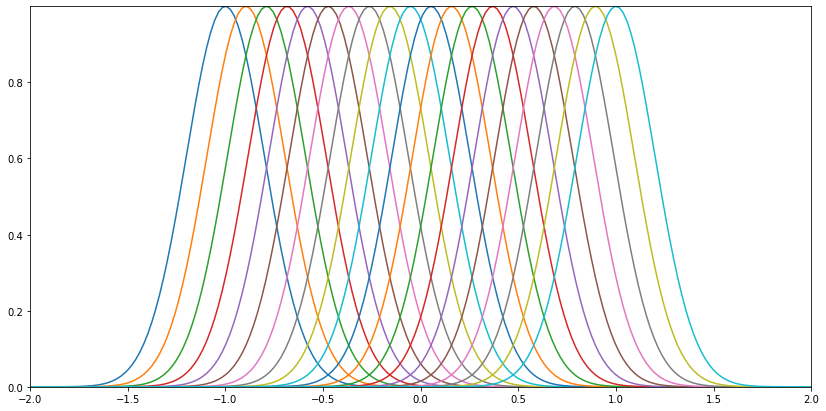

In [576]:
## Plot 20 Gaussian functions with given values

n = 20
peak = 1.0
sigma = 0.2                      # the stdev
lb = -1.0                        # lower bound for x value of peaks
ub = 1.0                         # upper bound ^
centres = np.linspace(lb,ub,n)   # the positions of the peaks of each function
x_range = np.linspace(-2,2,200)  # range of x values to plot

def gaussian(x, a, b, c):
    # Source: https://www.sciencedirect.com/topics/engineering/gaussian-function
    return a*np.exp( (-(x-b)**2) / (2*(c**2)) )

plt.figure(figsize=(14,7))
plt.margins(x=0,y=0)
for centre in centres:
    plt.plot(x_range, gaussian(x_range, peak, centre, sigma), label=f'x={centre}')
plt.show()

In [747]:
class Regression():
    def __init__(self,m,n):
        self.m = m
        self.n = n
        self.F = np.zeros((len(train_df),self.n))
        self.T = np.zeros((len(train_df),1))
        self.e = 0  # for calculating error
    
    # Generate the matrix F and column vector T
    def setFandT(self,df):
        for i, row in df.iterrows():
            self.F[i] = np.array([gaussian(row['x'],peak,g,sigma) for g in centres])
            self.T[i] = row['y']
        return self.F, self.T
    
    # Calculate least squares regression weights
    def regularizedLS(self, df, L):
        self.setFandT(df)
        Ft_F = np.matmul(self.F.T, self.F)
        Ft_T = np.matmul(self.F.T, self.T)
        I = np.identity(self.n)
        #print('Ft_F =\n',Ft_F)
        #print('Ft_T =\n',Ft_T)
        #print('I =\n',I)
        self.W = np.matmul(np.linalg.inv(Ft_F + L*I), Ft_T)
        return self.W

    # Use the calculated weights with the regulizer function
    def predict(self, df, L, x):
        self.regularizedLS(df, L)
        #print('\n',L)
        #print('x is',x)
        #print('W is',self.W)
        #y = np.dot(x, self.W)
        y = 0
        for i,w in enumerate(self.W):
            #print(i,w[0])
            y = y + (x**i)*w[0]
            if i == self.m:
                break
        return y 
    
    def sumSquaredError(self, df, L):
        self.e = 0
        for i,row in df.iterrows():
            self.e = self.e + (self.predict(df, L, row['x'])-row['y'])**2
        return self.e

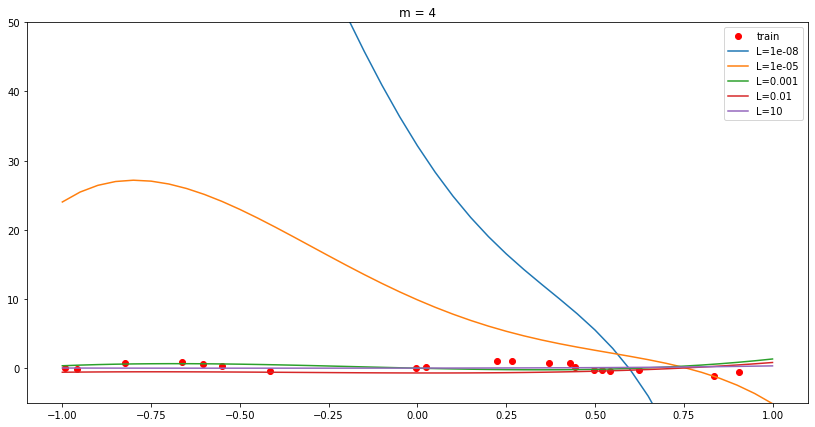

In [749]:
# Plot training data with regularized regression models in steps of 0.05
Lambda = [10**(-8), 10**(-5), 10**(-3),10**(-2), 10]
x_range = np.arange(-1,1.05,0.05)  # range of x values to plot

plt.figure(figsize=(14,7))
plt.plot(train_df['x'],train_df['y'],'o',color='red',label='train')
#plt.plot(test_df['x'],test_df['y'],'o',color='blue',label='test')

m=4
regression = Regression(m=m,n=n)
for L in Lambda:
    weights = regression.regularizedLS(train_df, L)
    #print(f'Weights for m={m}, L={L} are:\n{weights}')
    plt.plot(x_range, regression.predict(train_df, L, x_range), label=f'L={L}')
plt.title(f'm = {m}')
plt.legend()
plt.ylim(top=50,bottom=-5)    # For closer view of training data fit, comment out for regular view
plt.show()

### Experiment with changing m
Try changing m to get a more interesting + more accurate graph

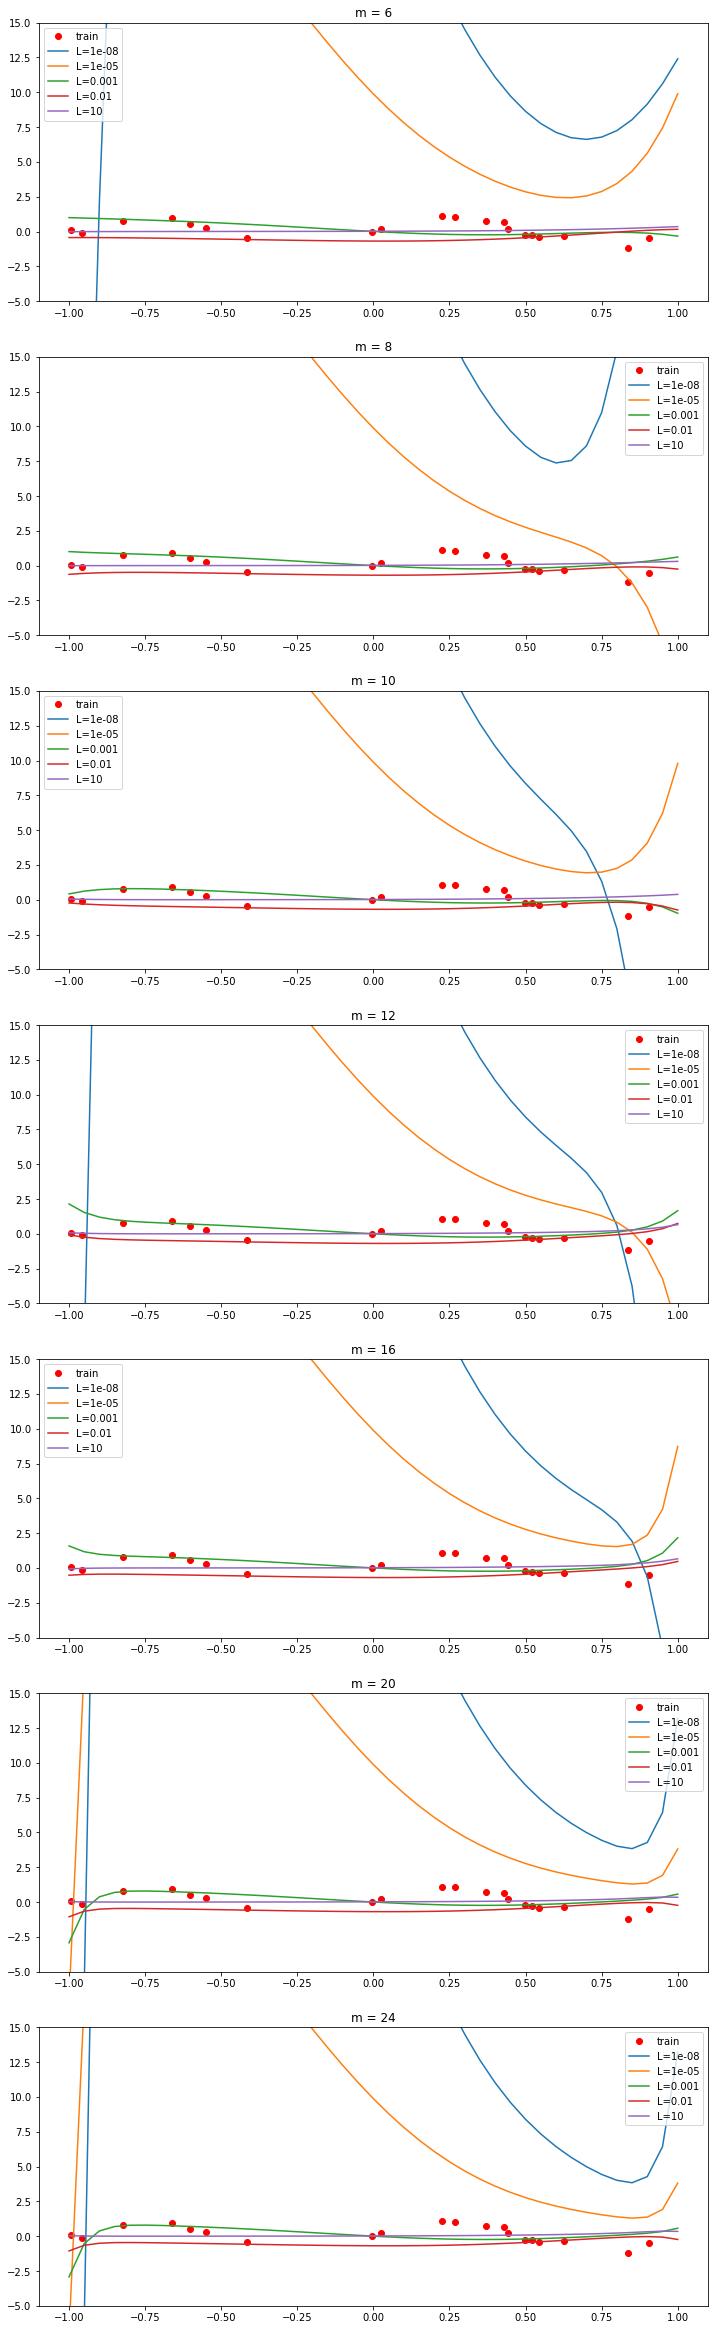

In [750]:
m_list = [6,8,10,12,16,20,24]
fig, axs = plt.subplots(len(m_list), figsize=(12,6*len(m_list)))

for i,ax in enumerate(axs):
    m = m_list[i]
    ax.set_title(f'm = {m}')
    regression = Regression(m=m,n=n)
    ax.plot(train_df['x'],train_df['y'],'o',color='red',label='train')
    for L in Lambda:
        weights = regression.regularizedLS(train_df, L)
        #print(f'Weights for m={m}, L={L} are:\n{weights}')
        ax.plot(x_range, regression.predict(train_df, L, x_range), label=f'L={L}')
        ax.set_ylim(top=15,bottom=-5)    # For closer view of training data
        ax.legend()

In [751]:
# Calculate the sum squared error for training and test data
# test every point we want to predict, check the error, sum for every point
# sum_i((y_i-t_i)^2) where i is all the diff points, yi is the output, ti is desired output

regression = Regression(m=10,n=n)
error = pd.DataFrame()

error['lambda'] = Lambda
error['ln_lambda'] = np.log(error['lambda'])
error['train'] = error['lambda'].apply(lambda x: regression.sumSquaredError(train_df, x))
error['test'] = error['lambda'].apply(lambda x: regression.sumSquaredError(test_df, x))

error

,lambda,ln_lambda,train,test
0,1.000000e-08,-18.420681,115479.634457,192805.017831
1,1.000000e-05,-11.512925,5270.594089,5590.607378
2,1.000000e-03,-6.907755,8.376701,57.001183
3,1.000000e-02,-4.605170,17.335747,12.555916
4,1.000000e+01,2.302585,8.401681,7.146021


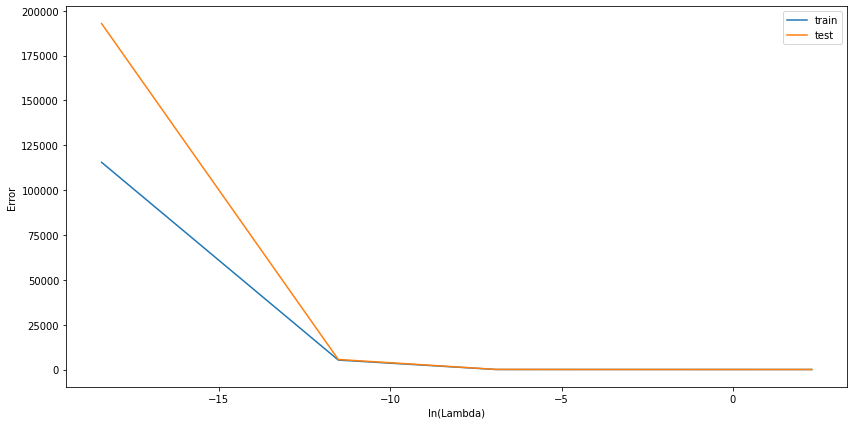

In [752]:
# Plot error as a function of ln(L)
error.plot(x='ln_lambda',y=['train','test'],figsize=(14,7),xlabel='ln(Lambda)',ylabel='Error')

I know something is very wrong with my model in Question 2 but I didn't have time to fix it before submitting so left as is :(

## Question 3

In [507]:
# Load the backprop-data file
backprop_data = pickle.load(open('./data/backprop-data.pkl','rb'),encoding='latin1')

# Convert pickle dict to pandas dataframe
backprop_df = pd.DataFrame()
backprop_df['v0'] = backprop_data['vectors'][0]
backprop_df['v1'] = backprop_data['vectors'][1]
backprop_df['labels'] = backprop_data['labels'].astype(np.int)

backprop_df

,v0,v1,labels
0,2.370732,0.114586,1
1,0.227078,4.881249,0
2,0.279069,0.752080,1
3,-0.260257,-0.025993,1
4,0.096724,0.144143,1
...,...,...,...
195,-2.621964,3.955295,0
196,0.637969,-0.366977,1
197,1.061410,0.056378,1
198,5.214607,0.559901,0


In [805]:
# Bishop 2006, section 5.3 (p245)
class Backpropagation():
    def __init__(self, n_in, n_hidden, n_out, learning_rate=0.01, epochs=1000):
        self.n_hidden = n_hidden
        self.L = learning_rate
        self.epochs = epochs
        
        self.hiddenLayer = {'weights': [np.random.rand(n_hidden) for n in range(n_in+1)],
                           'z_j': np.zeros(n_hidden),
                           'a_j': np.zeros(n_hidden),
                           'dj': np.zeros(n_hidden)}
        self.outputLayer = {'weights': [np.random.rand(n_out) for n in range(n_hidden+1)],
                           'y': np.zeros(n_out),
                           'a_k': np.zeros(n_out),
                           'dk': np.zeros(n_out)}
        self.NeuralNetwork = [self.hiddenLayer,self.outputLayer]

    def hiddenTransfer(self, a):
        return np.tanh(a)
    
    def dHidden(self,a):
        return 1 - np.tanh(a)**2
    
    def sigmoid(self, a):
        return 1/(1 + np.exp(-a))
    
    def dSigmoid(self,a):
        return self.sigmoid(a)*(1 - self.sigmoid(a))
    
    def activation(self, layer, x, j):
        a = 0
        for i in range(len(x)):
            a = a + self.NeuralNetwork[layer]['weights'][i][j]*x[i]
        return a
    
    def predict(self, x):   #Forward propagate
        ## Hidden Layer
        z = []
        for j in range(self.n_hidden): # [0...9]
            #print('\n',j)
            a_j = self.activation(0,x,j)
            self.NeuralNetwork[0]['a_j'][j] = a_j
            #print(a_j)
            z_j = self.hiddenTransfer(a_j)
            self.NeuralNetwork[0]['z_j'][j] = z_j
            z.append(z_j) 
        #print(f'z = {z}')
        ## Output Layer
        a_k = self.activation(1,z,0)
        self.NeuralNetwork[1]['a_k'][0] = a_k
        #print(a_k)
        y = self.sigmoid(a_k)
        self.NeuralNetwork[1]['y'][0] = y
        #print(f'y = {y}')
        return y        
    
    def backprop(self, x, t):
        y = self.NeuralNetwork[1]['y'][0]
        dk = (t - y)*self.dSigmoid(self.NeuralNetwork[1]['y'][0])
        self.NeuralNetwork[1]['dk'][0] = dk
        for j in range(self.n_hidden):
            dj = (dk*self.NeuralNetwork[1]['weights'][j][0] \
                *self.dHidden(self.NeuralNetwork[0]['z_j'][j]))
            self.NeuralNetwork[0]['dj'][j] = dj
    
    def train(self, df):
        for n in range(self.epochs):
            for index,row in df.iterrows():
                t = row['labels']
                # Make a prediction
                self.predict(row)
                # Run the backprop algorithm to get delta based on (t-y)
                self.backprop(row,t)
                
                #Update weights
                for i,neuron in enumerate(self.NeuralNetwork[0]['weights']):
                    for j,w in enumerate(neuron):
                        d = self.NeuralNetwork[0]['dj'][j]*row[i]
                        w = w + self.L*d               
                for j,neuron in enumerate(self.NeuralNetwork[1]['weights'][:-1]):
                    d = self.NeuralNetwork[1]['dk'][0]*self.NeuralNetwork[0]['z_j'][j]
                    w = neuron[0]
                    w = w + self.L*d
        
        return self.NeuralNetwork

In [807]:
network = Backpropagation(2,10,1)
network.train(backprop_df)

[{'weights': [array([0.34500118, 0.04413941, 0.50295688, 0.03911813, 0.33424216,
          0.33405587, 0.17130195, 0.88535421, 0.33017555, 0.81220648]),
   array([0.83245087, 0.19619232, 0.86662805, 0.50191484, 0.46527329,
          0.69296481, 0.30910202, 0.59188927, 0.65404229, 0.31701877]),
   array([0.90666362, 0.32492313, 0.64735341, 0.80443055, 0.92400971,
          0.94920734, 0.43437337, 0.957952  , 0.84421025, 0.37861075])],
  'z_j': array([ 0.99580471,  0.68079927,  0.99272095,  0.98130686,  0.86842616,
          0.98475911,  0.77129994,  0.37866861,  0.97829358, -0.62520953]),
  'a_j': array([ 3.08241956,  0.83060228,  2.80612829,  2.33167773,  1.32664175,
          2.43463559,  1.0235288 ,  0.39850448,  2.25619083, -0.73351245]),
  'dj': array([-0.0578366 , -0.04408669, -0.03251558, -0.06588682, -0.04985019,
         -0.06238845, -0.05195155, -0.12274065, -0.01293566, -0.01576086])},
 {'weights': [array([0.70308915]),
   array([0.34876856]),
   array([0.39342835]),
   array